## Introduction

Using the logistic regression to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is [here](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
print('Libraries imported')

Libraries imported


* Examine the data types-- as there are many columns
* Determine if the floating point values need to be scaled

In [2]:
data = pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv', sep=',')

In [3]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [4]:
data.loc[:, data.dtypes == np.object]

,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING
...,...
10294,WALKING_UPSTAIRS
10295,WALKING_UPSTAIRS
10296,WALKING_UPSTAIRS
10297,WALKING_UPSTAIRS


* All columns except Activity, are numerical.

In [5]:
data.shape

(10299, 562)

In [6]:
data.head(-5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,0.305631,-0.052702,-0.155684,-0.343078,-0.151250,-0.177296,-0.383228,-0.181989,-0.287325,-0.108216,...,-0.285985,-0.714939,-0.338596,0.363565,-0.951163,-0.228412,-0.691122,0.241953,0.180141,WALKING_UPSTAIRS
10290,0.321443,-0.023799,-0.119695,-0.336548,-0.183307,-0.154297,-0.396342,-0.224409,-0.220786,-0.073510,...,-0.172403,-0.563389,-0.874477,-0.684506,-0.948809,0.472612,-0.677946,0.256877,0.177768,WALKING_UPSTAIRS
10291,0.267413,-0.021596,-0.070550,-0.323426,-0.118042,-0.323907,-0.395468,-0.129623,-0.335741,0.053516,...,-0.388926,-0.761280,0.218079,-0.690839,-0.922779,0.232523,-0.672635,0.261034,0.178609,WALKING_UPSTAIRS
10292,0.147146,-0.046908,-0.069338,-0.348686,0.018057,-0.364716,-0.437199,0.019297,-0.411240,0.053516,...,-0.552567,-0.850109,0.524082,0.041970,-0.922941,0.489178,-0.660366,0.272243,0.178547,WALKING_UPSTAIRS


The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [7]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [8]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the breakdown of activities--they are relatively balanced.

In [10]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. `LabelEncoder` needs to be used to convert the activity labels to integers

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(13) # random data

7822    2
9840    0
490     5
7528    2
9404    2
2014    4
5664    5
6878    0
5476    2
5482    2
280     3
8658    3
4890    2
Name: Activity, dtype: int32

* Let's calculate the correlations between the dependent variables, and create a hist.

In [12]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values as NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

A histogram of the absolute value correlations.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

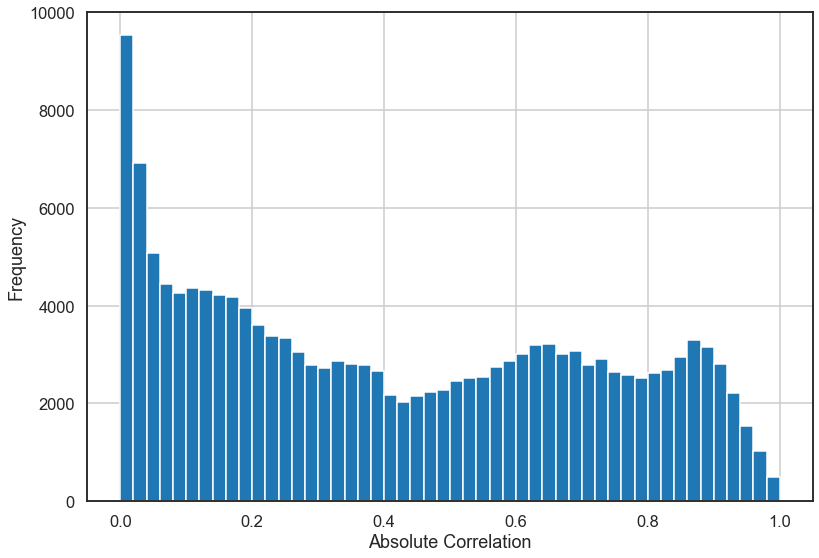

In [31]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(13, 9))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

* Identify rows that are most correlated

In [15]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.81')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764



#### Split the data into train and test data sets
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [17]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [18]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

#### Fit a logistic regression model without any regularization
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [20]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [21]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

#### Compare the magnitudes of the coefficients for each of the models. 

In [22]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(13)

lr                                                     l1  \
            0         1         2         3         4         5    0   
277  0.086075 -0.250780  0.147541  0.204377 -0.259073  0.084205  0.0   
102  0.026881  0.825757 -1.081170  1.611584 -1.342943  1.970885  0.0   
338  0.014661 -0.074391  0.126724  0.060644 -0.141915  0.060390  0.0   
453  0.233892  0.030986 -0.411785 -0.116153 -0.145448 -0.155962  0.0   
210 -0.011338  0.065728 -0.023260 -0.003970  0.293083  0.036449  0.0   
93   0.038343 -0.039503  0.347060 -0.515402  0.740662 -0.649554  0.0   
527  0.038797 -0.057332  0.169886  0.399904  0.982506 -0.696617  0.0   
511  0.189140 -0.004457 -0.059656  0.310717  0.355455  0.705443  0.0   
487  0.001048  0.239755  0.249350 -0.098215  0.346118  0.323537  0.0   
286 -0.032157  0.136030 -0.221647 -0.137578  0.664176 -0.395061  0.0   
197  0.121020  1.437662 -1.526909  1.255273  0.928926 -2.709340  0.0   
189  0.120584 -0.868743  0.802770 -0.578258  0.249134  0.404685  0.0   
256 -0.032050 -0.207689  0.111676  0.197816 -0.173262 -0.095728  0.0   

                                                             l2            \
            1         2         3         4         5         0         1   
277  0.000000  0.000000  0.344210 -0.511504  0.030926  0.152546  0.540418   
102  2.315900 -3.812641  3.379779 -2.382396  3.369313  0.115933  5.804071   
338  0.000000  0.000000  0.002676  0.000000  0.000000  0.023066 -0.112365   
453  0.000000 -0.388795  0.000000 -0.052091  0.000000  0.457465  0.186512   
210  0.000000  0.000000  0.000000  0.243913  0.000000 -0.039560  0.647781   
93   0.000000  0.000000 -0.385603  1.188708 -1.010114  0.071124  0.046283   
527  0.000000  0.261572  0.057978  1.350082  0.010025  0.059607 -0.508996   
511  0.000000  0.000000  0.387396  0.754391  1.381195  0.440593 -0.339673   
487  0.311986  0.207591  0.000977  0.165735  0.231176 -0.020499  0.666414   
286  0.000000  0.000000  0.000000  1.111914 -0.342848 -0.056938  1.590057   
197  2.315438 -2.228886  4.544591  2.867121 -7.688035  0.193333  2.944316   
189 -2.849853  0.478798 -2.053289  0.000000  1.524779  0.231941 -1.576185   
256  0.000000  0.000000  0.602622 -0.075906  0.000382 -0.060268 -1.620317   

                                              
            2         3         4          5  
277  0.189940  0.477189 -0.548123   0.268521  
102 -1.898230  4.010542 -2.608628   6.770417  
338  0.155193  0.204433 -0.205944  -0.007290  
453 -0.444068 -0.510420 -0.478645  -0.134479  
210 -0.063846  0.167975  0.435620  -0.098907  
93   0.596322 -0.846815  1.739695  -3.562900  
527  0.146099  0.392918  1.703247  -1.127583  
511  0.059345  0.881213  0.870156   2.953482  
487  0.302667 -0.405118  0.673432   1.397248  
286 -0.377619 -0.330403  1.112036  -1.748293  
197 -2.026187  4.030356  1.769273 -10.438793  
189  1.062339 -1.542538  0.411248   1.566555  
256  0.289727  0.357143 -0.364281  -0.474623

Prepare six separate plots for each of the multi-class coefficients.

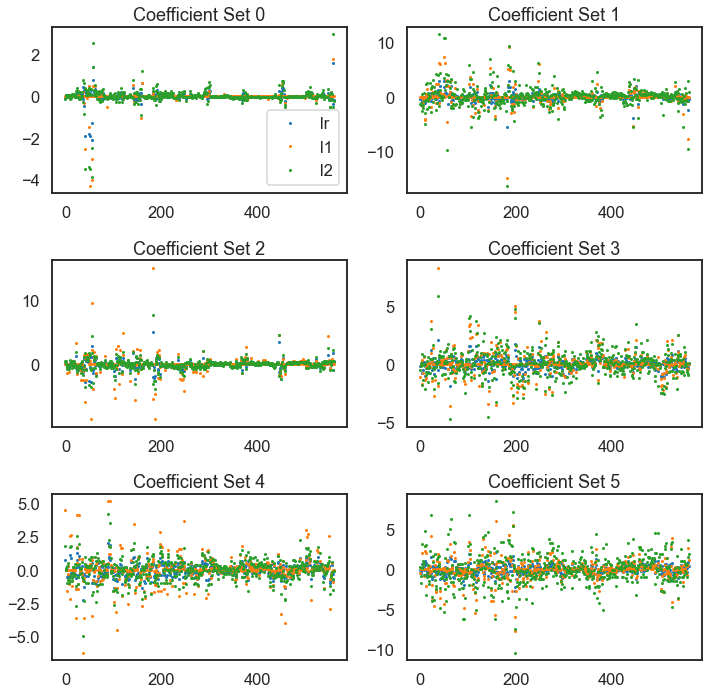

In [23]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

In [24]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


* Predict and store the class for each model.
* Store the probability for the predicted class for each model. 

In [25]:
y_prob.head()

,lr,l1,l2
0,0.998939,0.998928,0.999758
1,0.988165,0.999556,0.999477
2,0.987592,0.995116,0.999696
3,0.981381,0.999186,0.994338
4,0.998277,0.999921,0.999997


### Calculate the following error metrics: 

* Accuracy
* Precision
* Recall
* F-score

In [26]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [27]:
metrics

,lr,l1,l2
precision,0.984144,0.983835,0.983824
recall,0.984142,0.983819,0.983819
fscore,0.984143,0.983815,0.983819
accuracy,0.984142,0.983819,0.983819
auc,0.990384,0.990144,0.990165
